In [85]:
#The discrete class from gym allows us to create discrete enviroments
import numpy as np
import sys
import torch
import gym
from gym.envs.toy_text import discrete
from collections import defaultdict

# STEP 0: Define the Action Space

In [1]:
UP=0
RIGHT=1
DOWN=2
LEFT=3

# STEP 1: Plan the Enviroment

1. DEFINE ACTIONS
2. DEFINE GRID
3. DEFINE REWARDS FOR EVERY STATE
4. DEFINE TRANSITION PROBABILITIES
5. DEFINE BOUNDARIES OF THE GRID
6. DEFINE RENDER METHOD

# STEP 2: Define the Class

In [51]:
#I am inheriting the class discreteenv
class WindyGridWorldEnv(discrete.DiscreteEnv):
    #1.As always with classes I start by defining the 'constants'
    def __init__(self):
    #2.This is the size of my environment aa 7x10 grid
        self.shape=(7,10)
    #3.NS is the 'state_space' , total number of tiles    
        nS=self.shape[0]*self.shape[1]
    #4.Number of Actions    
        nA=4
    #5.Defining the wind locations, this is an array of 7x10, they are initially all 0
        winds=np.zeros(self.shape)
    #6.We are transforming columns 3,4,5,8 of the winds array to 1    
        winds[:,[3,4,5,8]]=1
    #7.We are transforming columns 6,7 of the winds array to 2
        winds[:,[6,7]]=2
    #8.We assign the goal as the tupple 3,7    
        self.goal=(3,7)
    #9.Calculate TRansition Probabilities, start by creating an empty dictionary
        P={}
        for s in range (nS):
    #10.This returns what would the index of that state would be: https://stackoverflow.com/questions/48135736/what-is-an-intuitive-explanation-of-np-unravel-index         
    #11.If I have an array of dimension 3x4 I am looking at the number 1 its position is probably (1,1) remeber that index starts in 0
            position=np.unravel_index(s,self.shape)
    #12.Creates dictionary with key for every state,within that key another dictionary with key for every action.fx This is what transition probabilitis look like in state 0,Remebering there is 4 actions I can take P[state=0] = {'state' = 0: {'action'= 0: [], 'action'= 1: [], 'action'=2: [], 'action'=3: []}}
            P[s]={a: [] for a in range(nA)}
    #13.Calculate TRanstion probabilitly for every action posible taken with a posble state    
            P[s][UP]=self._calculate_transition_prob(position, [-1,0],winds)
            P[s][RIGHT]=self._calculate_transition_prob(position, [0,1],winds)
            P[s][DOWN]=self._calculate_transition_prob(position, [1,0],winds)
            P[s][LEFT]=self._calculate_transition_prob(position, [0,-1],winds)
    #14. Define the Grid and the Starting position which row 4 and column 0, tupple (3,0). (Indexing is always confusing!!!!!)
        isd=np.zeros(nS)
        isd[np.ravel_multi_index((3,0),self.shape)]=1.0
    #15.In this case 'super(WindyGridworldEnv,self)'  is equivalent to using empty super(), basically inheriting only certain parameters from the 'discrete.DiscreteEnv' class, https://realpython.com/python-super/
    #16. I can call the variables nS, nA, P, isd without using self.nS or self.isd , etc....    
        super(WindyGridWorldEnv,self).__init__(nS,nA,P,isd)
    #18 we now define the method for calculating transition probabilities    
    def _calculate_transition_prob(self,current,delta,winds):
        new_position=np.array(current)+np.array(delta)+np.array([-1,0])*winds[tuple(current)]
        new_position =self._limit_coordinates(new_position).astype(int)
        new_state=np.ravel_multi_index(tuple(new_position),self.shape)
    #20 this is a boolean, if the new position is equal to the goal is_done=True and the env ends.    
        is_done=tuple(new_position)==self.goal
        return[(1.0,new_state,-1.0,is_done)]
    #21. Limiy Coordinates Avoids the agent to get out of the grid world. Fx in new_positions ends up being (-1,0) corrects it to
    def _limit_coordinates(self,coord):
    #22. coord 0 (rows) select the minimum value between the row and 6, This prevent the coordinate to be larges that 6 ( be larger than 7 rows)
        coord[0]=min(coord[0], self.shape[0] - 1)
    #23. This prevents to be less the rows to be smaller than 0, In conjuntion they bound the grids rows to position to index to 0 and 96    
        coord[0]=max(coord[0],0)
    #24. Likewise with this 2 bounding the grid to columns 0 to 9 (10 columns)    
        coord[1]=min(coord[1], self.shape[1] - 1)
        coord[1]=max(coord[1],0)
        return coord
    #25. Finally we render the enviroment
    def render(self):
    #26. storing whatever happens here for later
        outfile=sys.stdout
        for s in range(self.nS):
            position=np.unravel_index(s,self.shape)
            if self.s== s:
                output="x"
            elif position ==self.goal:
                output="T"
            else:
                output="o"
            if position[1]==0:
                output=output.lstrip()
            if position[1]==self.shape[1]-1:
                output= output.rstrip()
                output += "\n"
            outfile.write(output)
        outfile.write("\n")
                

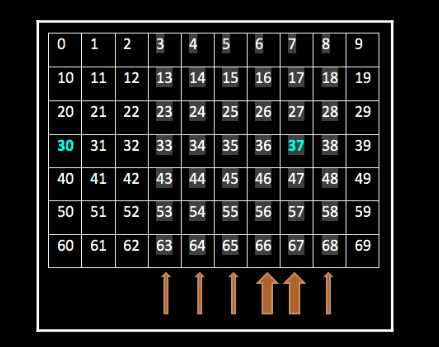

In [52]:
env=WindyGridWorldEnv()
env.render()

oooooooooo
oooooooooo
oooooooooo
xooooooToo
oooooooooo
oooooooooo
oooooooooo



In [54]:
print(env.step(1))
env.render()

(32, -1.0, False, {'prob': 1.0})
oooooooooo
oooooooooo
oooooooooo
ooxooooToo
oooooooooo
oooooooooo
oooooooooo



In [55]:
env.P

{0: {0: [(1.0, 0, -1.0, False)],
  1: [(1.0, 1, -1.0, False)],
  2: [(1.0, 10, -1.0, False)],
  3: [(1.0, 0, -1.0, False)]},
 1: {0: [(1.0, 1, -1.0, False)],
  1: [(1.0, 2, -1.0, False)],
  2: [(1.0, 11, -1.0, False)],
  3: [(1.0, 0, -1.0, False)]},
 2: {0: [(1.0, 2, -1.0, False)],
  1: [(1.0, 3, -1.0, False)],
  2: [(1.0, 12, -1.0, False)],
  3: [(1.0, 1, -1.0, False)]},
 3: {0: [(1.0, 3, -1.0, False)],
  1: [(1.0, 4, -1.0, False)],
  2: [(1.0, 3, -1.0, False)],
  3: [(1.0, 2, -1.0, False)]},
 4: {0: [(1.0, 4, -1.0, False)],
  1: [(1.0, 5, -1.0, False)],
  2: [(1.0, 4, -1.0, False)],
  3: [(1.0, 3, -1.0, False)]},
 5: {0: [(1.0, 5, -1.0, False)],
  1: [(1.0, 6, -1.0, False)],
  2: [(1.0, 5, -1.0, False)],
  3: [(1.0, 4, -1.0, False)]},
 6: {0: [(1.0, 6, -1.0, False)],
  1: [(1.0, 7, -1.0, False)],
  2: [(1.0, 6, -1.0, False)],
  3: [(1.0, 5, -1.0, False)]},
 7: {0: [(1.0, 7, -1.0, False)],
  1: [(1.0, 8, -1.0, False)],
  2: [(1.0, 7, -1.0, False)],
  3: [(1.0, 6, -1.0, False)]},
 8: {

# SARSA ALGORITHM

# STEP 1: DEFINING EPSILON GREEDY POLICY

In [81]:
#Just like in regular Q learning a random policy guided by the value of epsilon and the value of Q at a particular state is what guides the action to take
def gen_epsilon_greedy_policy(n_action, epsilon):
    def policy_function(state,Q):
        probs=torch.ones(n_action)*epsilon/n_action
        best_action=torch.argmax(Q[state]).item()
        probs[best_action]+=1.0 - epsilon
        action=torch.multinomial(probs,1).item()
        return action
    return policy_function

# STEP 2: SPECIFY MODEL VARIABLES

In [82]:
n_episode=500
length=[0]*n_episode
total_reward=[0]*n_episode
gamma=1
alpha=0.4
epsilon=0.1

#Create the random policy
epsilon_greedy_policy=gen_epsilon_greedy_policy(env.action_space.n,epsilon)

# STEP 3: SARSA Algorithm

In [83]:
def sarsa(env, gamma, n_episode, alpha):
    n_action=env.action_space.n
    Q=defaultdict(lambda:torch.zeros(n_action))
    for episode in range(n_episode):
        state=env.reset()
        is_done=False
        action=epsilon_greedy_policy(state,Q)
        while not is_done:
            next_state,reward, is_done, info=env.step(action)
            next_action=epsilon_greedy_policy(next_state,Q)
            td_delta=reward+gamma*Q[next_state][next_action]-Q[state][action]
            Q[state][action]+=alpha*td_delta
            length[episode]+=1
            total_reward[episode]+=reward
            if is_done:
                break
            state=next_state
            action=next_action
        policy={}
        for state,actions in Q.items():
            policy[state]=torch.argmax(actions).item()
        return Q, policy

In [78]:
optimal_q,optimal_policy=sarsa(env,gamma,n_episode, alpha)

optimal_policy

{30: 2,
 40: 1,
 20: 0,
 10: 1,
 0: 1,
 1: 3,
 2: 2,
 3: 3,
 4: 3,
 5: 0,
 6: 2,
 7: 3,
 8: 2,
 9: 2,
 12: 2,
 11: 2,
 13: 0,
 19: 1,
 29: 3,
 18: 3,
 22: 2,
 23: 2,
 21: 1,
 32: 1,
 31: 1,
 33: 1,
 39: 2,
 28: 3,
 14: 3,
 38: 3,
 17: 3,
 42: 1,
 41: 1,
 43: 1,
 52: 0,
 51: 2,
 50: 0,
 53: 1,
 24: 2,
 49: 1,
 59: 2,
 48: 0,
 61: 0,
 60: 2,
 62: 3,
 63: 2,
 34: 2,
 27: 2,
 15: 0,
 44: 1,
 54: 1,
 25: 1,
 69: 1,
 58: 1,
 37: 0}

# SOLVING THE TAXI ENVIRONMENT

In [87]:
env=gym.make('Taxi-v3')

In [93]:
env.reset()
env.render()

+---------+
|R: | : :G|
| : | : : |
| : : : : |
| | : | : |
|Y| : |B: |
+---------+



In [95]:
n_state=env.observation_space.n
n_state

500

In [97]:
print(env.step(0))

(432, -1, False, {'prob': 1.0})


In [98]:
env.render()

+---------+
|R: | : :G|
| : | : : |
| : : : : |
| | : | : |
|Y| : |B: |
+---------+
  (South)


In [103]:
n_episode=100000
length=[0]*n_episode
total_reward=[0]*n_episode
gamma=1
alpha=0.4
epsilon=0.1

#Create the random policy
epsilon_greedy_policy=gen_epsilon_greedy_policy(env.action_space.n,epsilon)



In [104]:
optimal_q,optimal_policy=sarsa(env,gamma,n_episode, alpha)

optimal_policy

{124: 1,
 224: 0,
 324: 2,
 344: 3,
 444: 3,
 244: 0,
 264: 5,
 364: 2,
 464: 1,
 424: 2,
 24: 3,
 104: 3,
 204: 2,
 144: 1,
 304: 3,
 404: 2,
 4: 2,
 44: 1,
 164: 4,
 64: 1,
 184: 4,
 284: 4,
 384: 2,
 484: 2,
 84: 1}

# GRID SEARCH: GETTING THE BEST ALPHA AND EPSILON

In [109]:
#We will essentially start looping over all the parameter options
alpha_options=[0.4,0.5,0.6]
epsilon_options=[0.1,0.03,0.01]
n_episode=500

In [124]:
for alpha in alpha_options:
    for epsilon in epsilon_options:
        length=[0]*n_episode
        total_reward=[0]*n_episode
     #1.No need to assign any values to sarsa because inside the function we al already capting the value of length
        sarsa(env,gamma,n_episode, alpha)
     #2.Create a list of reward_per step with the 
        reward_per_step=[reward/200 for reward,step in zip(total_reward,length)]
     #3.Output
        print('alpha: {} , epsilon {}'.format(alpha,epsilon))
        print('Average Reward Over{} , episodes: {} '.format(n_episode,sum(total_reward)/n_episode))
        print('Average Length over {} episodes: {}'.format(n_episode,sum(length)/n_episode))
        print('Average Reward per step over {} episodes: {}'.format(n_episode,sum(reward_per_step)/n_episode))
        

alpha: 0.4 , epsilon 0.1
Average Reward Over500 , episodes: -1.3 
Average Length over 500 episodes: 0.4
Average Reward per step over 500 episodes: -0.0065
alpha: 0.4 , epsilon 0.03
Average Reward Over500 , episodes: -1.228 
Average Length over 500 episodes: 0.4
Average Reward per step over 500 episodes: -0.00614
alpha: 0.4 , epsilon 0.01
Average Reward Over500 , episodes: -1.444 
Average Length over 500 episodes: 0.4
Average Reward per step over 500 episodes: -0.00722
alpha: 0.5 , epsilon 0.1
Average Reward Over500 , episodes: -1.372 
Average Length over 500 episodes: 0.4
Average Reward per step over 500 episodes: -0.006860000000000001
alpha: 0.5 , epsilon 0.03
Average Reward Over500 , episodes: -1.372 
Average Length over 500 episodes: 0.4
Average Reward per step over 500 episodes: -0.006860000000000001
alpha: 0.5 , epsilon 0.01
Average Reward Over500 , episodes: -1.21 
Average Length over 500 episodes: 0.4
Average Reward per step over 500 episodes: -0.00605
alpha: 0.6 , epsilon 0.1
A

# CODE APPENDIX

In [ ]:
super().

In [ ]:
winds=np.zeros((7,10)) 

In [6]:
winds

array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.]])

In [9]:
winds[:,[3,4,5,8]]=1

In [10]:
winds

array([[0., 0., 0., 1., 1., 1., 0., 0., 1., 0.],
       [0., 0., 0., 1., 1., 1., 0., 0., 1., 0.],
       [0., 0., 0., 1., 1., 1., 0., 0., 1., 0.],
       [0., 0., 0., 1., 1., 1., 0., 0., 1., 0.],
       [0., 0., 0., 1., 1., 1., 0., 0., 1., 0.],
       [0., 0., 0., 1., 1., 1., 0., 0., 1., 0.],
       [0., 0., 0., 1., 1., 1., 0., 0., 1., 0.]])

In [13]:
#Example array
np.unravel_index([22, 41, 37], (7,6))

# Esto me dice que este que la position 22, esta en (3,4) del array( recordemos que el indice empieza en 0 so in really is the fourth row fith column)

(array([3, 6, 6]), array([4, 5, 1]))

In [12]:
s=0
nA=4
P={}

P[1]={a:[] for a in range(nA)}

In [3]:
P[0][UP]=1

In [13]:
P

{1: {0: [], 1: [], 2: [], 3: []}}

In [18]:
isd=np.zeros(70)
isd[np.ravel_multi_index((3,0),(7,10))]=1.0
isd

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0.])

In [19]:
position=np.unravel_index(0,(7,10))
position

(0, 0)

In [33]:
np.array((0,0)) + np.array((-1,0)) + np.array((-1,0))*winds[(0, 0)]

array([-1.,  0.])

In [23]:
np.array((-1,0))

array([-1,  0])

In [26]:
        winds=np.zeros((7,10))
    #6.We are transforming columns 3,4,5,8 of the winds array to 1    
        winds[:,[3,4,5,8]]=1
    #7.We are transforming columns 6,7 of the winds array to 2
        winds[:,[6,7]]=2
    #8.We assign the goal a

In [32]:
winds[(0, 0)]

0.0